In [1]:
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.observations.observation import EddiesObservations
import numpy as np
############Load in the eddy data for anticyclonic and cyclonic and the SSH data
######Anticyclonic data
dir = "/data/watkinson/Spring2022/Satellite/data/eddies/Anticyclonic/"
a = EddiesObservations.load_file(dir + "Anticyclonic_20060605.nc")
######Cyclonic data
dir = "/data/watkinson/Spring2022/Satellite/data/eddies/Cyclonic/"
c = EddiesObservations.load_file(dir + "Cyclonic_20060605.nc")
######SSH data
dir = "/data/watkinson/Spring2022/Satellite/data/"
SSH_data = RegularGridDataset((dir + "modified_hycom_gomu_501_2006060500_t000.nc"),
    "lon",
    "lat")
######Try Sat data: doesnt work need to regrid
dir = "/data/watkinson/Summer2022/data/cafe/"
sat_data = RegularGridDataset((dir + "regrid_CAFE_GOM_20061532006160.nc"),
    "lon",
    "lat")

We assume pixel position of grid is centered for /data/watkinson/Spring2022/Satellite/data/modified_hycom_gomu_501_2006060500_t000.nc
We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/cafe/regrid_CAFE_GOM_20061532006160.nc


187186
173880
187186


/tmp/ipykernel_48169/529740230.py:75: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = fig.colorbar(cf,location='bottom',format='%.2f',shrink=.6,pad=.04)


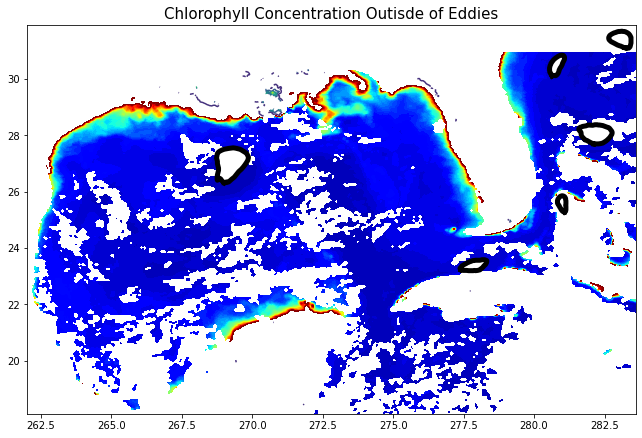

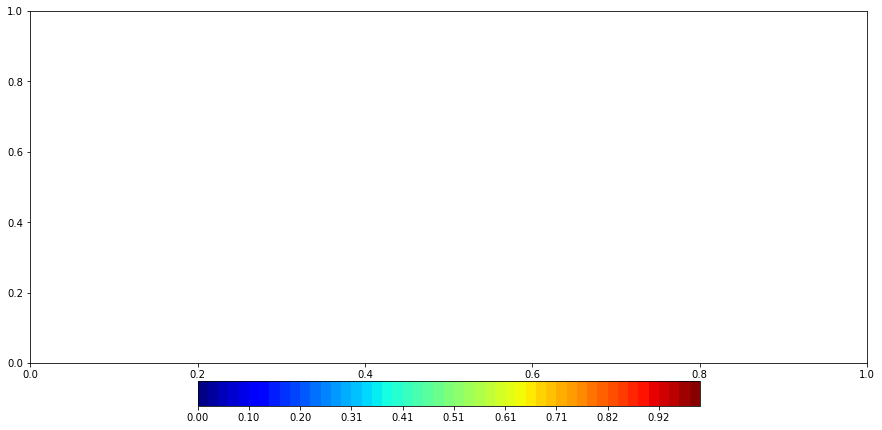

In [2]:
#Get the pixels inside or outside of each eddy
from matplotlib import pyplot as plt
from matplotlib.path import Path
from numpy import ones
from py_eddy_tracker.poly import create_vertice
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((0.05, 0.05, 0.9, 0.9))
ax.set_aspect("equal")
ax.set_title("Chlorophyll Concentration Outisde of Eddies",fontsize=15)#,fontweight='bold')

######code for creating mask for values inside the eddy contour
x_name, y_name = a.intern(False)# We will use the outter effective contour and not the inner speed contour
adt= sat_data.grid("chlor_a")
#adt
print(np.size(adt))
print(np.count_nonzero(adt))

mask = ones(adt.shape, dtype="bool")#creates boolean array to use in masking values for cyclonic eddies
print(np.count_nonzero(mask==True))
'''
######takes the vertice points that defines the Cyclonic eddy edge and finds i,j pixels within those vertices
for eddy in a:
    i, j = Path(create_vertice(eddy[x_name], eddy[y_name])).pixels_in(sat_data)
    mask[i, j] = False
#print(np.count_nonzero(mask==True))
adt.mask[:] += ~mask #apply the mask to the data that you want to investigate
'''
for eddy in a:
            i, j = Path(create_vertice(eddy[x_name], eddy[y_name])).pixels_in(sat_data)
            mask[i, j] = False
adt.mask[:] = mask

#print(np.count_nonzero(adt))
#print(adt.mask)
adt2 = adt.mask.astype(int)
#print(adt2)
#x = np.array(adt.mask * adt, dtype='float64')
#print(x)
#print(adt)
''' 
#####Display the maskes variables and eddy contours all on the same plot defined by ax function above
m = file.display(ax, variable,vmin=vmin,vmax=vmax)#displays the new masked variable on the axis plot defined above
cycl.display(ax, label="Cyclonic ({nb_obs} eddies)", color="b", lw=1, ls='solid',extern_only=True)
ax.grid()#creates grid on plot
######create colorbar located at the bottom and positioned lower to make room for x axis labels
cb = plt.colorbar(m,location='bottom',format='%.2f',shrink=.6,pad=.06)
cb.ax.set_xlabel(cb_label,fontsize=15)#label the colorbar
#cb.set_clim(cb_range)
'''
import xarray as xr
dir = "/data/watkinson/Summer2022/data/cafe/"
sat_data2 = xr.open_dataset((dir + "regrid_CAFE_GOM_20061532006160.nc"))
fig = plt.figure(figsize=(15, 8))
lat=sat_data2.lat
lon=sat_data2.lon
chlor = sat_data2.chlor_a
adt2 = np.transpose(adt2)
phyto = chlor * adt2
phyto = phyto.where(phyto != 0)
#print(phyto)
#print(np.count_nonzero(phyto))
#phyto = phyto * chlorophyll
#phyto=np.transpose(x)
#print(np.shape(x))
#phyto = phyto * chlorophyll
#print(np.size(phyto))

#print(phyto)

#from Map_plot import *
a.display(ax, label="Cyclonic ({nb_obs} eddies)", color="k", lw=5, ls='solid',extern_only=True)
lon2d,lat2d=np.meshgrid(lon,lat)
cf = ax.contourf(lon2d,lat2d,phyto,cmap='jet',levels=np.linspace(0.001,1,50))
cl = ax.contour(lon2d,lat2d,phyto)#,levels=np.arange(17,34,10))#,lw=3)#,lw=3,color='k')
cbar = fig.colorbar(cf,location='bottom',format='%.2f',shrink=.6,pad=.04)

#map_plot(lon,lat,phyto,'Phytoplankton Carbon Biomass (mg C * $m^{-3}$)','Phytoplankton Carbon Biomass on 06/02/06',False,np.linspace(17,34,50),10)
#map_plot(lon,lat,phyto,'Phytoplankton Carbon Biomass (mg C * $m^{-3}$)','Phytoplankton Carbon Biomass on 06/02/06',True,np.linspace(17,34,50),10)

In [ ]:
dir = "/data/watkinson/Summer2022/data/cafe/"
sat_data = RegularGridDataset((dir + "regrid_CAFE_GOM_20061532006160.nc")

In [26]:
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
import netCDF4 as nc
import matplotlib.cm as cm #must have for color maps
from mpl_toolkits.basemap import Basemap # must have for map plotting
import numpy.ma as ma
#from summary import *

def map_plot(XC,YC,z,cbtitle,title,cbar_range,level,font):
    
    #lat=YC[0,:]
    #lon=XC[:,0]
    lat=YC
    lon=XC
    m1 = Basemap(projection='cea', llcrnrlon=-99, llcrnrlat=17, urcrnrlon=-76, 
             urcrnrlat=32, resolution='i')
    m1.drawcoastlines(color='k', linewidth=.5)
    m1.drawcountries()
    m1.drawmeridians(np.arange(-98,-74,4),labels=[0,0,0,1],linewidth=0)
    m1.drawparallels(np.arange(18,33,3),labels=[1,0,0,0],linewidth=0)

    #make 2d lon and lat arrays
    lon2d,lat2d=np.meshgrid(lon,lat)
    x,y=m1(lon2d,lat2d)

    colormap = cm.get_cmap('viridis')
    if (cbar_range):#True = set a range for the colorbar
        cs_data = m1.contourf(x, y, z,cmap=colormap,levels=level)
    else:
        cs_data = m1.contourf(x, y, z,cmap=colormap)
    #cnt_chirp_19 = m1.contour(x, y, np.transpose(Zs[16, 0, :, :]), 
                          #colors='black', linewidths=1)  # ,levels=range(0,30,2))
    cb_data= m1.colorbar(cs_data, location='bottom',format='%.2f',
                         pad=.2)
    cb_data.ax.tick_params(labelsize=font)#adjust size of font
    cb_data.set_label(cbtitle)
   #plt.clabel(cnt_chirp_19, fmt='%.0f', fontsize=3, inline=True)
    plt.title(title)
    maxdata=np.max(z)
    mindata=np.min(z)
    print('Max Value is: ',maxdata)# print the max data from map plot
    alpha = np.where(z==maxdata)
    print(alpha)
    print('Min Value is: ',mindata)
    beta=np.where(z==mindata)
    print(beta)
    #summry(z)
    plt.show()
    